# TensorFlow - basics

In [1]:
import tensorflow as tf
print(f'Hello from TF version {tf.__version__}')

Hello from TF version 2.3.0


The fundamental object in TensorFlow (TF) is the tensor. A `tf.Tensor` represents a multi-dimensional array with a uniform datatype (similarly to NumPy's `np.ndarray`).

#### TF can be like NumPy.

In [2]:
a = tf.constant(42)
b = tf.constant([8, -6])
c = tf.constant([[1, 2], [5, 3], [4, 6]])
d = tf.constant([[1, 0], [-1, 5]])
a + b * (c @ d)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[  34,  -18],
       [  58,  -48],
       [  26, -138]], dtype=int32)>

Numpy-like functions are readily available, indexing & slicing and reshaping work like you would expect them to.

In [3]:
print(f'Max of c: {tf.reduce_max(c)}')
print(f'Indices of column maxima of c: {tf.argmax(c)}')
print(f'Slice and reshape result: {tf.reshape(c[1:, :], [-1, ])}')

Max of c: 6
Indices of column maxima of c: [1 2]
Slice and reshape result: [5 3 4 6]


Numpy interoperability is usually not a problem. Most TF operations automatically convert a Numpy array (or even a Python list!) to a tensor. You can transform a `tf.Tensor` to a Numpy array by calling `.numpy()` on it.

In [4]:
import numpy as np
d @ np.array([[1], [0]])

<tf.Tensor: shape=(2, 1), dtype=int32, numpy=
array([[ 1],
       [-1]], dtype=int32)>

Note that TF also includes ragged (uneven) tensors, string tensors and sparse tensors, all of which can be useful.

In [5]:
uneven_list = [['zero'], ['one', 'one'], ['two', 'three', 'five'], ['eight', 'thirteen']]
print(f'Ragged (uneven) tensor: \n{tf.ragged.constant(uneven_list)}\n')
sparse_tensor = tf.sparse.SparseTensor(indices=[[0, 0], [1, 2]],
                                       values=[1, 2],
                                       dense_shape=[3, 4])
print(f'Sparse tensor: \n{sparse_tensor}\n')
print(f'Sparse tensor in dense representation: \n{tf.sparse.to_dense(sparse_tensor)}')

Ragged (uneven) tensor: 
<tf.RaggedTensor [[b'zero'], [b'one', b'one'], [b'two', b'three', b'five'], [b'eight', b'thirteen']]>

Sparse tensor: 
SparseTensor(indices=tf.Tensor(
[[0 0]
 [1 2]], shape=(2, 2), dtype=int64), values=tf.Tensor([1 2], shape=(2,), dtype=int32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64))

Sparse tensor in dense representation: 
[[1 0 0 0]
 [0 0 2 0]
 [0 0 0 0]]


#### What can I do in TF that I can't do in Numpy?

We'll start with variables. In TF, tensors are immutable, which means that if you perform an operation on a tensor, a copy will be created and the original left unmodified. For something that will be updated frequently (say, model parameters during optimization), this won't do and we'll need to use a `tf.Variable`. A variable behaves similarly to a tensor, but it is mutable and can be modified.

In [49]:
w = tf.Variable(0.7)
b = tf.Variable(-0.1)

In [68]:
x = tf.cast(tf.linspace(-1, 1, 20), tf.float32)
y = x + tf.random.uniform((20,), -0.05, 0.05, seed=117)

with tf.GradientTape() as tape:
    y_hat = x * w + b
    mse = tf.reduce_mean(tf.pow(y - y_hat, 2))


In [62]:
dw, db = tape.gradient(mse, [w, b])
dw, db

(<tf.Tensor: shape=(), dtype=float32, numpy=-0.22123986>,
 <tf.Tensor: shape=(), dtype=float32, numpy=-0.20318396>)

In [63]:
w.assign(w - 0.01 * dw)
b.assign(b - 0.01 * db)

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=-0.09796816>

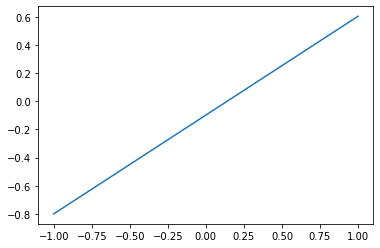

In [70]:
import matplotlib.pyplot as plt
plt.plot(x, y_hat)